In [1]:
#importing the necessay dependancies
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import tensorflow as tf
tf.random.set_seed(0)
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import  ImageDataGenerator

In [2]:
# Image parameters
IMAGE_SIZE = 256
BATCH_SIZE = 16
CHANNELS = 3
EPOCHS =5  # Increase the number of epochs for better training

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"D:\Projects\AgriSmart Detect\train",  # Use raw string to avoid escape characters
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 48352 files belonging to 26 classes.


In [4]:
class_names = dataset.class_names #storing the class names in a new varable class_names
n_class = len(class_names)
#print class names and check a batch of images
print(f"Classes:{class_names}, Number of classes: {n_class}")

for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape) #Shape of the batch
    print(image_batch[0]) #Shape of the first image  in the batch

Classes:['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew'], Number of classes: 26
(16, 256, 256, 3)
tf.Tensor(
[[[148. 137. 143.]
  [151. 140. 146.]
  [154. 143. 149.]
  ...
  [119. 108. 114.]
  [183. 172. 178.]
  [173. 162. 168.]]

 [[152. 141. 147.]
  [151. 140. 146.]
  [150. 139. 145.]
  ...
  [1

In [5]:
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew']

In [6]:
len(class_names)

26

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(image_batch[0].numpy())

(16, 256, 256, 3)
[[[158. 147. 141.]
  [159. 148. 142.]
  [154. 143. 137.]
  ...
  [163. 150. 142.]
  [151. 138. 130.]
  [165. 152. 144.]]

 [[159. 148. 142.]
  [160. 149. 143.]
  [161. 150. 144.]
  ...
  [141. 128. 120.]
  [146. 133. 125.]
  [137. 124. 116.]]

 [[172. 161. 155.]
  [169. 158. 152.]
  [167. 156. 150.]
  ...
  [173. 160. 152.]
  [139. 126. 118.]
  [143. 130. 122.]]

 ...

 [[177. 172. 168.]
  [178. 173. 169.]
  [179. 174. 170.]
  ...
  [199. 195. 192.]
  [215. 211. 208.]
  [179. 175. 172.]]

 [[179. 174. 170.]
  [180. 175. 171.]
  [182. 177. 173.]
  ...
  [206. 202. 199.]
  [198. 194. 191.]
  [181. 177. 174.]]

 [[183. 178. 174.]
  [184. 179. 175.]
  [185. 180. 176.]
  ...
  [203. 199. 196.]
  [200. 196. 193.]
  [175. 171. 168.]]]


In [8]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(16, 256, 256, 3)
[24 13 24  1  7 10 17 20 16  6  1 24  8  9 24 12]


In [9]:
class_names = dataset.class_names
n_class = len(class_names)

In [10]:
n_class

26

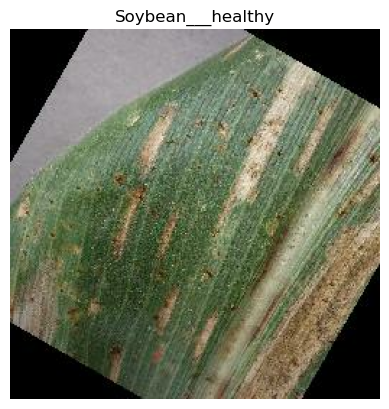

In [11]:
for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[4]])
    plt.axis("off")

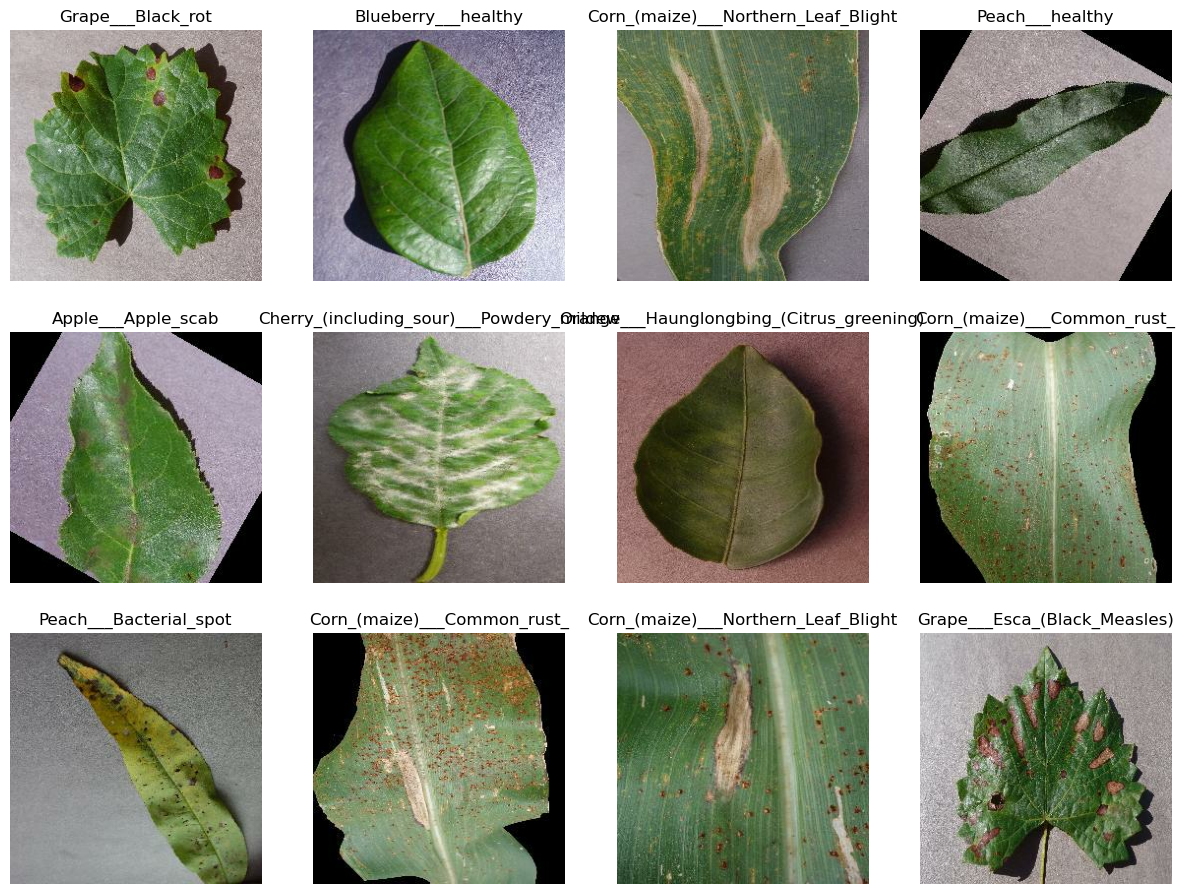

In [12]:
#Plotting the images of the dataset
plt.figure(figsize=(15,15))
for image_batch,label_batch in dataset.take(1):
    for i in range(12):
        axis = plt.subplot(4, 4, i +1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
plt.show()        
    


In [13]:
#Splitting the dataset
train_split = 0.6
val_split = 0.2
test_split = 0.2

In [14]:
def get_partition_dataset_tf(ds, train_split=0.6, val_split=0.2, test_split=0.2, shuffle=True, shuffle_size=1000, seed=12):
    
#shuffle the dataset
    dataset_size = dataset.cardinality().numpy()
    if shuffle:
        ds = ds.shuffle(buffer_size=shuffle_size, seed=12)

    train_size = int(train_split * dataset_size)
    val_size = int(val_split * dataset_size)

#Split the dataset
    train_ds = ds.take(train_size)
    remaining_ds = ds.skip(train_size)
    
    val_ds = remaining_ds.take(val_size)
    test_ds = remaining_ds.skip(val_size)

    return train_ds, val_ds, test_ds

# Applying the function to the dataset
train_ds, val_ds, test_ds = get_partition_dataset_tf(dataset)

#Verify the size of the split
print(f"Training set size: {train_ds.cardinality().numpy()}")
print(f"Validation set size: {val_ds.cardinality().numpy()}")
print(f"Test set size: {test_ds.cardinality().numpy()}")

Training set size: 1813
Validation set size: 604
Test set size: 605


In [15]:
#Optimizing training performance using cache and prefetch techniques
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
#Resizing and rescaling before supplying preprocessing pipeline
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)

])

In [17]:
# Generating new training applying different transformation to image using flip, zoom, translation, rotation and contrast: makes the model robust when training
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomZoom(0.2), #Random zoom
    layers.RandomTranslation(0.2,0.2), # Random translation
    layers.RandomRotation(0.2), #Optionally keep rotation
    layers.RandomContrast(0.2)  #Random contrast adjustment
])

## Modeling

**Convolution Neural Network**

In [18]:
input_shape = ( IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Building the model
model = models.Sequential([

    layers.InputLayer(input_shape=input_shape),
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),  # Add another Conv layer
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), # Add a deeper Conv layer
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'), # Add a deeper Conv layer
    layers.MaxPooling2D((2, 2)),

    #Flattening the data so as to get an array of neurons
    layers.Flatten(),
    layers.Dense(64, activation='relu'),  # Increase units in dense layer
    layers.Dense(n_class, activation='softmax')
])


model.summary()
#MaxPooling preserves the size of the image and reduces the size


c:\Users\ADMIN\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897,818 (3.42 MB)

 Trainable params: 897,818 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#model compilation
model.compile(
    optimizer = "adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=["accuracy"] # for tracking the training process
)

In [20]:
#storing the epoch records in history variable
history = model.fit(
    train_ds,
    epochs=5,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/5
 406/1813 ━━━━━━━━━━━━━━━━━━━━ 49:37 2s/step - accuracy: 0.0468 - loss: 6.1757

In [ ]:
#Evaluating the  model
scores = model.evaluate(test_ds)
print(f"Test Loss: {scores[0]}, Test Accuracy:{scores[1]}")

In [ ]:
history

In [ ]:
history.params

In [ ]:
history.history.keys()

In [ ]:
#Accessing trainning accuracy, loss, and validation metrics
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history["val_loss"]

In [ ]:
#Ploting Accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="validation Accuracy")
plt.legend(loc="lower rigth")
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs") #X label for clarity
plt.ylabel("Accuracy") # label for clarity
plt.show()

In [ ]:
#Plotting loss

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label="validation Accuracy")
plt.legend(loc="lower rigth")
plt.title("Training and validation Accuracy")
plt.Xlabe("Epochs") #X label for clarity
plt.ylabel("Accuracy") # label for clarity
plt.show()

In [ ]:
# Predicting and displayinf the first image from the test set
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    first_label = labels_batch[0].numpy()

    plt.imshow)(first_image)
    plt.axis("off")
    plt.title("Actual label: " + class_names[first_label])
    plt.show()

    batch_prediction = model.predict(image_batch)
    print("Predict label:", class_names[np.argmax(bath_prediction[0])])

In [ ]:
#Prediction function
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) #creating batch

    predicted_class = np.argmax(predictions[0])
    confidence = round(100 * np.max(predictions[0], 2))
    return predicted_class, confidence

In [ ]:
#Displaying predictions for images in the dataset
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9): #Displaying 9 images
        axis = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labesl[i].numpy()]
        plt.title(f"Actual: {actual_class}\n Predicted: {predicted_class}\n Confidence: {confidence}%")
        plt.axis("off")

plt.show()